<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Quantum-Mechanics-with-Sympy-and-Sympsi-('Sym'-+-'Psi')" data-toc-modified-id="Quantum-Mechanics-with-Sympy-and-Sympsi-('Sym'-+-'Psi')-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quantum Mechanics with Sympy and Sympsi ('Sym' + 'Psi')</a></span></li><li><span><a href="#Using-Sympy-and-QuTiP-together" data-toc-modified-id="Using-Sympy-and-QuTiP-together-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using Sympy and QuTiP together</a></span></li><li><span><a href="#Discrete-Fourier-Transform-(DFT)" data-toc-modified-id="Discrete-Fourier-Transform-(DFT)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Discrete Fourier Transform (DFT)</a></span><ul class="toc-item"><li><span><a href="#Prelude-to-the-Quantum-Fourier-Transform-(DFT)" data-toc-modified-id="Prelude-to-the-Quantum-Fourier-Transform-(DFT)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prelude to the Quantum Fourier Transform (DFT)</a></span></li></ul></li></ul></div>

# Quantum Mechanics with Sympy and Sympsi ('Sym' + 'Psi')

Reference: [Sympsi](http://github.com/jrjohansson/sympy-quantum-notebooks)

In [1]:
from sympy import *
from sympy import abc
import sympsi as Psi
from sympsi.pauli import *
import inspect

ModuleNotFoundError: No module named 'sympsi'

In [3]:
import sympy as sp
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.circuitplot import *

from qutip import *
from qutip.qip.circuit import *



In [4]:
%matplotlib inline

# Using Sympy and QuTiP together

The powerful symbolic computation facilites in Sympy have no parallel in QuTiP. QuTiP, while powerful in its own right, is insufficient when it comes to doing symbolic computations.

On the other hand, QuTiP has a powerful module for plotting quantum circuits. This module takes qutip.Qobj types as input. In order to be able to plot the output of a sympy calculation in a quantum circuit, we can use the tolist() method of sympy matrices and arrays, to convert these objects into nested lists, which can then be passed to Qobj() to return a qutip.Qobj object.

...

I was wrong. Sympy's circuit plot module also works perfectly. You just have to remember to use %matplotlib inline before you begin!

In [5]:
# In the following, the argument use_latex='mathjax' setting is essential to prevent
# problems with displaying latex-ed sympy matrices in an ipython notebook

init_printing(use_latex='mathjax')

In [6]:
theta, t = symbols('theta,t')

In [7]:
hasattr(theta,'__call__')

True

In [8]:
type(Symbol)

sympy.core.assumptions.ManagedProperties

In [9]:
x, y = var('x, y')

In [10]:
varExpr = (x**2 + y**2)/x
varExpr

 2    2
x  + y 
───────
   x   

In [11]:
varDeriv = diff(varExpr,x)
varDeriv

     2    2
    x  + y 
2 - ───────
        2  
       x   

In [12]:
integrate(varExpr,y)

        3
       y 
x⋅y + ───
      3⋅x

In [13]:
varSuperPos = (Ket('psi') + Ket('phi'))/sqrt(2)
varSuperPos

√2⋅(❘φ⟩ + ❘ψ⟩)
──────────────
      2       

In [14]:
inner_prod = Dagger(varSuperPos) * varSuperPos
inner_prod

(⟨φ❘ + ⟨ψ❘)⋅(❘φ⟩ + ❘ψ⟩)
───────────────────────
           2           

In [15]:
qapply(inner_prod)

⟨φ❘φ⟩   ⟨φ❘ψ⟩   ⟨ψ❘φ⟩   ⟨ψ❘ψ⟩
───── + ───── + ───── + ─────
  2       2       2       2  

In [16]:
density_mat = qapply(varSuperPos*Dagger(varSuperPos))
density_mat

❘φ⟩⋅⟨φ❘   ❘φ⟩⋅⟨ψ❘   ❘ψ⟩⋅⟨φ❘   ❘ψ⟩⋅⟨ψ❘
─────── + ─────── + ─────── + ───────
   2         2         2         2   

In [17]:
varQubit = Qubit('00')
varQubit

❘00⟩

In [18]:
isinstance(varQubit,State)

True

In [19]:
varGate = HadamardGate(1)
varGate

H 
 1

In [20]:
varGate.get_target_matrix()

⎡1    1  ⎤
⎢──   ── ⎥
⎢√2   √2 ⎥
⎢        ⎥
⎢1   -√2 ⎥
⎢──  ────⎥
⎣√2   2  ⎦

In [21]:
qutipGate = Qobj(varGate.get_target_matrix().tolist())
qutipGate

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

In [22]:
# alternatively ...

matrix2numpy(varGate.get_target_matrix())

array([[1/sqrt(2), 1/sqrt(2)],
       [1/sqrt(2), -sqrt(2)/2]], dtype=object)

In [23]:
from sympy.physics.quantum import gate

In [24]:
gate.CNOT?

In [25]:
varGate2 = gate.CNOT(1,0)
varGate2

CNOT   
    1,0

In [26]:
varGate2.get_target_matrix()

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [27]:
varState = Qubit('00')
varState

❘00⟩

In [28]:
varState.qubit_values

(0, 0)

In [29]:
Qobj(represent(varState).tolist())

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

In [30]:
varCircuit = CNOT(0,1) * H(0)
varCircuit

CNOT   ⋅H 
    0,1  0

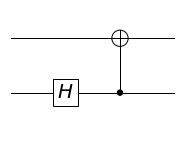

In [31]:
circuit_plot(varCircuit,nqubits=2)

In [32]:
represent(varCircuit,nqubits=2)

⎡1    1            ⎤
⎢──   ──   0    0  ⎥
⎢√2   √2           ⎥
⎢                  ⎥
⎢          1   -√2 ⎥
⎢0    0    ──  ────⎥
⎢          √2   2  ⎥
⎢                  ⎥
⎢          1    1  ⎥
⎢0    0    ──   ── ⎥
⎢          √2   √2 ⎥
⎢                  ⎥
⎢1   -√2           ⎥
⎢──  ────  0    0  ⎥
⎣√2   2            ⎦

In [32]:
represent(varGate,nqubits=2)

⎡  1              1            ⎤
⎢─────    0     ─────      0   ⎥
⎢  ___            ___          ⎥
⎢╲╱ 2           ╲╱ 2           ⎥
⎢                              ⎥
⎢         1                1   ⎥
⎢  0    ─────     0      ───── ⎥
⎢         ___              ___ ⎥
⎢       ╲╱ 2             ╲╱ 2  ⎥
⎢                              ⎥
⎢                 ___          ⎥
⎢  1           -╲╱ 2           ⎥
⎢─────    0    ───────     0   ⎥
⎢  ___            2            ⎥
⎢╲╱ 2                          ⎥
⎢                              ⎥
⎢                          ___ ⎥
⎢         1             -╲╱ 2  ⎥
⎢  0    ─────     0     ───────⎥
⎢         ___              2   ⎥
⎣       ╲╱ 2                   ⎦

In [33]:
from sympy.physics.quantum import qft

In [34]:
qft.QFT(0,3)

QFT   
   0,3

In [35]:
qft.Fourier??

# Discrete Fourier Transform (DFT)

## Prelude to the Quantum Fourier Transform (DFT)

Reference: Bacon (2006), Quantum Computing Lecture Notes

In [33]:
omega, N = var('omega, N')
omega, N

(ω, N)

In [34]:
var?

The N-dimensional DFT matrix $\Omega$ is defined as:
$$ \Omega_{ij} = \omega^{i \cdot j} $$
where:
$$ \omega = \exp^{(2\pi i/N)} $$

In [37]:
N = 4

In [38]:
dftMatrix = Matrix(N,N,lambda i,j: omega**(i*j))
dftMatrix

⎡1  1   1   1 ⎤
⎢             ⎥
⎢        2   3⎥
⎢1  ω   ω   ω ⎥
⎢             ⎥
⎢    2   4   6⎥
⎢1  ω   ω   ω ⎥
⎢             ⎥
⎢    3   6   9⎥
⎣1  ω   ω   ω ⎦

Use `sympy.lambdify` to cast `dftMatrix` into a numpy expression

In [39]:
dftMatrixNumpy = lambdify(omega,dftMatrix,"numpy")
dftMatrixNumpy

<function numpy.<lambda>>

In [40]:
import numpy as np

In [41]:
np.i0?

In [42]:
np.exp(-2*np.pi*1j)

(1+2.4492935982947064e-16j)

In [43]:
dftMatrixNumpy(np.exp(-1j*2*np.pi/N))

matrix([[  1.00000000e+00 +0.00000000e+00j,
           1.00000000e+00 +0.00000000e+00j,
           1.00000000e+00 +0.00000000e+00j,
           1.00000000e+00 +0.00000000e+00j],
        [  1.00000000e+00 +0.00000000e+00j,
           6.12323400e-17 -1.00000000e+00j,
          -1.00000000e+00 -1.22464680e-16j,
          -1.83697020e-16 +1.00000000e+00j],
        [  1.00000000e+00 +0.00000000e+00j,
          -1.00000000e+00 -1.22464680e-16j,
           1.00000000e+00 +2.44929360e-16j,
          -1.00000000e+00 -3.67394040e-16j],
        [  1.00000000e+00 +0.00000000e+00j,
          -1.83697020e-16 +1.00000000e+00j,
          -1.00000000e+00 -3.67394040e-16j,
           5.51091060e-16 -1.00000000e+00j]])

In [44]:
gamma = exp(-I*2*pi/N)
gamma

-ⅈ

In [45]:
dftMatrix.subs(omega,-I)

⎡1  1   1   1 ⎤
⎢             ⎥
⎢1  -ⅈ  -1  ⅈ ⎥
⎢             ⎥
⎢1  -1  1   -1⎥
⎢             ⎥
⎣1  ⅈ   -1  -ⅈ⎦

In [46]:
lambdify((),_45,"numpy")

<function numpy.<lambda>>

In [47]:
ldft = lambdify(omega, dftMatrix, "numpy")
ldft

<function numpy.<lambda>>

In [48]:
import numpy as np

In [49]:
ldft(np.exp(-2*np.pi*1j/N))

matrix([[  1.00000000e+00 +0.00000000e+00j,
           1.00000000e+00 +0.00000000e+00j,
           1.00000000e+00 +0.00000000e+00j,
           1.00000000e+00 +0.00000000e+00j],
        [  1.00000000e+00 +0.00000000e+00j,
           6.12323400e-17 -1.00000000e+00j,
          -1.00000000e+00 -1.22464680e-16j,
          -1.83697020e-16 +1.00000000e+00j],
        [  1.00000000e+00 +0.00000000e+00j,
          -1.00000000e+00 -1.22464680e-16j,
           1.00000000e+00 +2.44929360e-16j,
          -1.00000000e+00 -3.67394040e-16j],
        [  1.00000000e+00 +0.00000000e+00j,
          -1.83697020e-16 +1.00000000e+00j,
          -1.00000000e+00 -3.67394040e-16j,
           5.51091060e-16 -1.00000000e+00j]])

In [50]:
np.complex(2j*2j)

(-4+0j)

In [51]:
exp(np.complex(2j))

 2.0⋅ⅈ
ℯ     

In [52]:
TensorProduct(Qubit(0),Qubit(0))

❘0⟩⨂ ❘0⟩

In [53]:
Qubit('00')

❘00⟩

In [54]:
Psi.boson.BosonOp("a")

a

In [55]:
qapply?

In [56]:
sp.physics.quantum.operatorset.operators_to_state(_55)

NameError: name '_55' is not defined

In [ ]:
Psi.boson.BosonOp('a')

In [ ]:
Psi.boson.BosonOp?

In [60]:
matrix_to_qubit?

In [61]:
from sympy.physics import qho_1d as sho

In [74]:
from sympy.physics import hydrogen as hyd

In [77]:
from sympy.physics import hep

In [80]:
from sympy.physics import optics

In [82]:
optics.gaussopt?